# Exploratory Data Analysis on Russian Propaganda Telegram Channels
## Author: Artem Korniienko

In [1]:
import re
import string
import random

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from tqdm import tqdm

## Getting merged dataset

In [2]:
merged_channels = "../merged_channels"
output_file = f"{merged_channels}.csv"

In [3]:
df = pd.read_csv(output_file, low_memory=False)

In [ ]:
df.shape

## What is a date range of posts for our dataset?

In [5]:
min(df["date"]), max(df["date"])

('2015-09-22 11:53:32+00:00', '2022-12-26 10:59:50+00:00')

## Let's observe types of media in channels and their respective counts.

In [6]:
df.groupby(["type"])["type"].count()

type
photo      3374347
sticker       9879
text       3407150
video      1309641
voice         7676
Name: type, dtype: int64

## Let's inspect final structure of dataframe

In [7]:
df.head(10)

,Unnamed: 0,id,date,views,reactions,to_id,fwd_from,message,type,duration,channel_name,frw_from_title,frw_from_name,msg_entity
0,0,12602.0,2022-12-19 13:05:23+00:00,3645.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),NaN,🇵🇰🇦🇫 Исламабад сделал ставку на афганских тали...,photo,NaN,Abbasdjuma,NaN,NaN,NaN
1,1,12601.0,2022-12-19 09:52:21+00:00,5831.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),NaN,"🕯️ 6 лет назад, 19 декабря 2016 года, в резуль...",photo,NaN,Abbasdjuma,NaN,NaN,NaN
2,2,12600.0,2022-12-19 09:18:53+00:00,3944.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),NaN,🇮🇷🇷🇺 Глава МИД Ирана Хосейн Амир Абдоллахиян с...,photo,NaN,Abbasdjuma,NaN,NaN,NaN
3,3,12599.0,2022-12-19 08:32:39+00:00,2970.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),"MessageFwdHeader(date=datetime.datetime(2022, ...",Наши Друзья открыли \nсбор для одного из Доне...,photo,NaN,Abbasdjuma,NaN,NaN,NaN
4,4,12598.0,2022-12-18 21:41:25+00:00,4993.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),NaN,"🇷🇺 Сегодня, 19 декабря в России празднуют День...",photo,NaN,Abbasdjuma,NaN,NaN,NaN
5,5,12597.0,2022-12-18 13:39:35+00:00,5713.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),NaN,📰📰📰❤️\n\n#Дайджест_СМИ \n\n📰 ABC: Папа римский...,photo,NaN,Abbasdjuma,NaN,NaN,NaN
6,6,12596.0,2022-12-18 08:38:12+00:00,6186.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),NaN,🇷🇺🇷🇸🇬🇷 Российский посол в Сербии Александр Боц...,photo,NaN,Abbasdjuma,NaN,NaN,NaN
7,7,12595.0,2022-12-17 14:37:20+00:00,6181.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),"MessageFwdHeader(date=datetime.datetime(2022, ...",🇮🇷🇷🇺 Директор Центрального разведывательного у...,photo,NaN,Abbasdjuma,NaN,NaN,NaN
8,8,12594.0,2022-12-17 08:31:08+00:00,80764.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),NaN,🇷🇺🇺🇦 ⚡️⚡️⚡️⚡️⚡️\n\nНедавно я писал об освобожд...,video,103.0,Abbasdjuma,NaN,NaN,NaN
9,9,12593.0,2022-12-17 08:00:35+00:00,6889.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1261603870),"MessageFwdHeader(date=datetime.datetime(2022, ...","🇮🇳🇪🇺 В Индии уверены, что Запад не откажется о...",photo,NaN,Abbasdjuma,NaN,NaN,NaN


# Observing dataset

## Question: How many times Putin was mentioned overall?

In [9]:
putin_pattern = re.compile(r'\b[пП][уУ][тТ][иИ][нН]\b')
altered_df = df
altered_df["pu_mention_count"] = df["message"].apply(lambda x: len(re.findall(putin_pattern, str(x))))
total_mentions_pu = altered_df["pu_mention_count"].sum()
print(total_mentions_pu)

335699


## Question: How many times was Zelensky mentioned overall?

In [10]:
zelensky_pattern = re.compile(r'\b[зЗ][еЕ][лЛ][еЕ][нН][сС][кК][иИ][йЙ]\b')
altered_df["ze_mention_count"] = df["message"].apply(lambda x: len(re.findall(zelensky_pattern, str(x))))
total_mentions_ze = altered_df["ze_mention_count"].sum()
print(total_mentions_ze)

79235


## Question: What is their mention rate per day?

In [13]:
altered_df['date'] = pd.to_datetime(altered_df['date'])
altered_df = altered_df[altered_df["date"].dt.year >= 2018]

daily_mentions_pu = altered_df.groupby(altered_df["date"].dt.date)["pu_mention_count"].sum()

daily_mentions_ze = altered_df.groupby(altered_df["date"].dt.date)["ze_mention_count"].sum()

max_pu_date = daily_mentions_pu.idxmax()
max_pu_mentions = daily_mentions_pu.max()

max_ze_date = daily_mentions_ze.idxmax()
max_ze_mentions = daily_mentions_ze.max()

In [8]:
peak_threshold = 50

plt.figure(figsize=(12, 6))
plt.plot(daily_mentions_pu.index, daily_mentions_pu.values, label="Mentions of Putin")
plt.plot(daily_mentions_ze.index, daily_mentions_ze.values, label="Mentions of Zelensky")
plt.xlabel("Date")
plt.ylabel("Mentions per Day")
plt.title("Mentions of Putin and Zelensky over time")
plt.legend()
plt.grid(True)
plt.show()

print(f'Most Putin Mentions: {max_pu_mentions} on {max_pu_date}')
print(f'Most Zelensky Mentions: {max_ze_mentions} on {max_ze_date}')

plt.savefig("graphs/ZvsPu.png")

NameError: name 'daily_mentions_pu' is not defined

<Figure size 1200x600 with 0 Axes>

## Question: What are the main words that are commonly used together with Putin?

In [15]:
nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words("russian"))
co_occurred_words = []

total_messages = len(df)
chunk_size = 100 


def process_chunk(chunk):
    chunk_co_occurred_words = []
    for index, row in chunk.iterrows():
        message_date = row['date']
        if message_date >= pd.to_datetime('2022-02-24', utc=True):
            message = row['message']
            words = nltk.word_tokenize(str(message))
            words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]
            if 'путин' in words:
                chunk_co_occurred_words.extend([word for word in words if word != 'путин'])
    return chunk_co_occurred_words


for chunk_start in range(0, total_messages, chunk_size):
    chunk_end = min(chunk_start + chunk_size, total_messages)
    chunk = df.iloc[chunk_start:chunk_end]
    chunk_co_occurred_words = process_chunk(chunk)
    co_occurred_words.extend(chunk_co_occurred_words)

    progress = (chunk_end) / total_messages * 100
    print(f"Processed {progress:.2f}% of messages", end="\r")

word_counts = Counter(co_occurred_words)
most_common_co_occurred = word_counts.most_common(50)

for word, count in most_common_co_occurred:
    print(f"Word: {word}, Co-occurrence Count: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yg_ya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yg_ya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word: это, Co-occurrence Count: 41203
Word: россии, Co-occurrence Count: 40559
Word: владимир, Co-occurrence Count: 26494
Word: рф, Co-occurrence Count: 18661
Word: президент, Co-occurrence Count: 18060
Word: украине, Co-occurrence Count: 15725
Word: россия, Co-occurrence Count: 15472
Word: заявил, Co-occurrence Count: 15217
Word: украины, Co-occurrence Count: 13546
Word: также, Co-occurrence Count: 11520
Word: сша, Co-occurrence Count: 11276
Word: которые, Co-occurrence Count: 11171
Word: путина, Co-occurrence Count: 10067
Word: года, Co-occurrence Count: 9242
Word: страны, Co-occurrence Count: 9114
Word: время, Co-occurrence Count: 8530
Word: будут, Co-occurrence Count: 8401
Word: президента, Co-occurrence Count: 8372
Word: сегодня, Co-occurrence Count: 7780
Word: подписаться, Co-occurrence Count: 7750
Word: против, Co-occurrence Count: 7105
Word: который, Co-occurrence Count: 6742
Word: сказал, Co-occurrence Count: 6467
Word: лет, Co-occurrence Count: 6116
Word: очень, Co-occurrence

## What about Zelensky?

In [16]:
stop_words = set(stopwords.words("russian"))
co_occurred_words = []

total_messages = len(df)
chunk_size = 100


def process_chunk(chunk):
    chunk_co_occurred_words = []
    for index, row in chunk.iterrows():
        message_date = row['date']
        if message_date >= pd.to_datetime('2022-02-24', utc=True):
            message = row['message']
            words = nltk.word_tokenize(str(message))
            words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]
            if 'зеленский' in words:
                chunk_co_occurred_words.extend([word for word in words if word != 'зеленский'])
    return chunk_co_occurred_words


for chunk_start in range(0, total_messages, chunk_size):
    chunk_end = min(chunk_start + chunk_size, total_messages)
    chunk = df.iloc[chunk_start:chunk_end]
    chunk_co_occurred_words = process_chunk(chunk)
    co_occurred_words.extend(chunk_co_occurred_words)

    progress = (chunk_end) / total_messages * 100
    print(f"Processed {progress:.2f}% of messages", end="\r")

word_counts = Counter(co_occurred_words)
most_common_co_occurred = word_counts.most_common(50)

for word, count in most_common_co_occurred:
    print(f"Word: {word}, Co-occurrence Count: {count}")

Word: украины, Co-occurrence Count: 23453
Word: это, Co-occurrence Count: 23156
Word: россии, Co-occurrence Count: 12731
Word: украине, Co-occurrence Count: 11314
Word: заявил, Co-occurrence Count: 10059
Word: владимир, Co-occurrence Count: 9706
Word: президент, Co-occurrence Count: 9269
Word: зеленского, Co-occurrence Count: 7574
Word: сша, Co-occurrence Count: 7067
Word: украина, Co-occurrence Count: 6840
Word: рф, Co-occurrence Count: 5908
Word: всу, Co-occurrence Count: 5831
Word: которые, Co-occurrence Count: 5651
Word: также, Co-occurrence Count: 5278
Word: россия, Co-occurrence Count: 5202
Word: нато, Co-occurrence Count: 4914
Word: время, Co-occurrence Count: 4734
Word: страны, Co-occurrence Count: 4609
Word: президента, Co-occurrence Count: 4448
Word: против, Co-occurrence Count: 4265
Word: россией, Co-occurrence Count: 4135
Word: украину, Co-occurrence Count: 3960
Word: который, Co-occurrence Count: 3913
Word: украинских, Co-occurrence Count: 3886
Word: киев, Co-occurrence Co

## Question: What is the distribution of the word "hohol"

In [17]:
df['date'] = pd.to_datetime(df['date'], utc=True)

messages_containing_hoh = df[df['message'].str.contains("хох", case=False, na=False)]

message_distribution = messages_containing_hoh.resample('W', on='date')['id'].count()

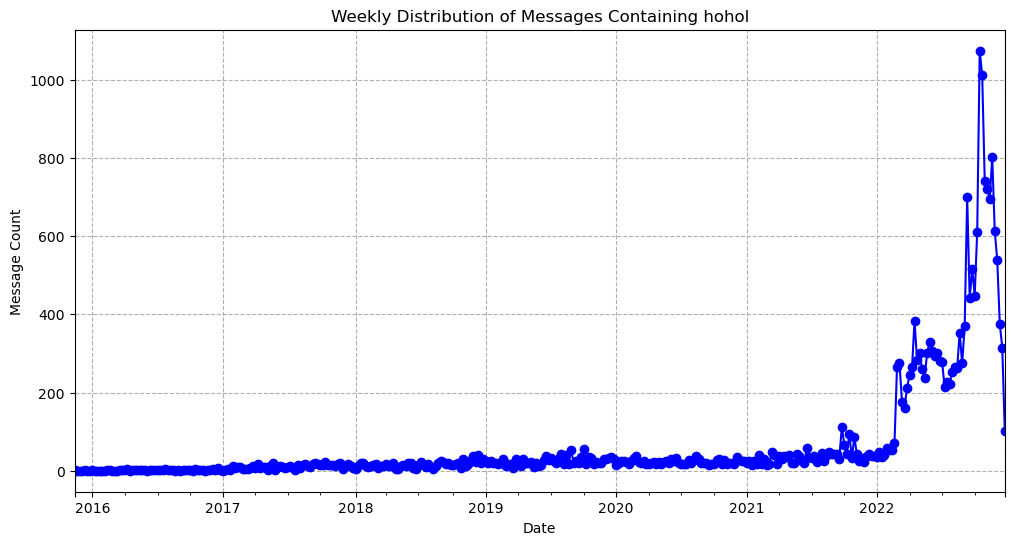

In [18]:
plt.figure(figsize=(12, 6))
message_distribution.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Weekly Distribution of Messages Containing hohol')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.grid(True, linestyle='--')
plt.savefig("D:\homework\css\week4HW\gXox.png")
plt.show()

## Qustion: What is average duration of the video file?

In [19]:
media_posts = df[df['type'] == 'video']

average_duration = media_posts['duration'].mean()

print(f"The average duration of media posts across all channels is {average_duration:.2f} seconds.")

The average duration of media posts across all channels is 69.09 seconds.


## Question: How does the number of posts vary by month or year for each channel?(shown top 10)

In [20]:
df['date'] = pd.to_datetime(df['date'], utc=True)

df['post_month'] = df['date'].dt.month
df['post_year'] = df['date'].dt.year

posts_by_month = df.groupby(['channel_name', 'post_year', 'post_month'])['id'].count()

posts_by_month = posts_by_month.reset_index()

top_10_channels = posts_by_month.groupby(['channel_name'])['id'].sum().nlargest(10).index

top_10_data = posts_by_month[posts_by_month['channel_name'].isin(top_10_channels)]

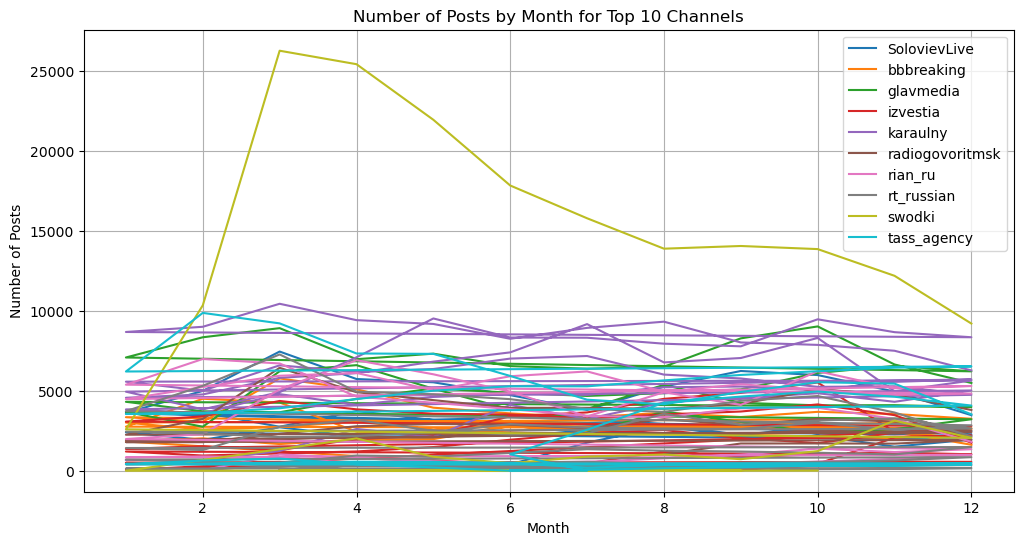

In [21]:
plt.figure(figsize=(12, 6))
for channel_name, channel_data in top_10_data.groupby('channel_name'):
    plt.plot(channel_data['post_month'], channel_data['id'], label=channel_name)

plt.title('Number of Posts by Month for Top 10 Channels')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.legend()
plt.grid(True)
plt.show()

## Question: Which channels have the most active posting schedule?

In [22]:
df['date'] = pd.to_datetime(df['date'], utc=True)

posts_per_day = df.groupby(['channel_name', df['date'].dt.date])['id'].count()

average_posts_per_day = posts_per_day.groupby('channel_name').mean()

most_active_channels = average_posts_per_day.nlargest(5) 

print("Channels with the Most Active Posting Schedules:")
print(most_active_channels)

Channels with the Most Active Posting Schedules:
channel_name
swodki       307.025078
karaulny     199.581577
glavmedia    171.784591
chtddd       136.967672
ssigny       116.461347
Name: id, dtype: float64


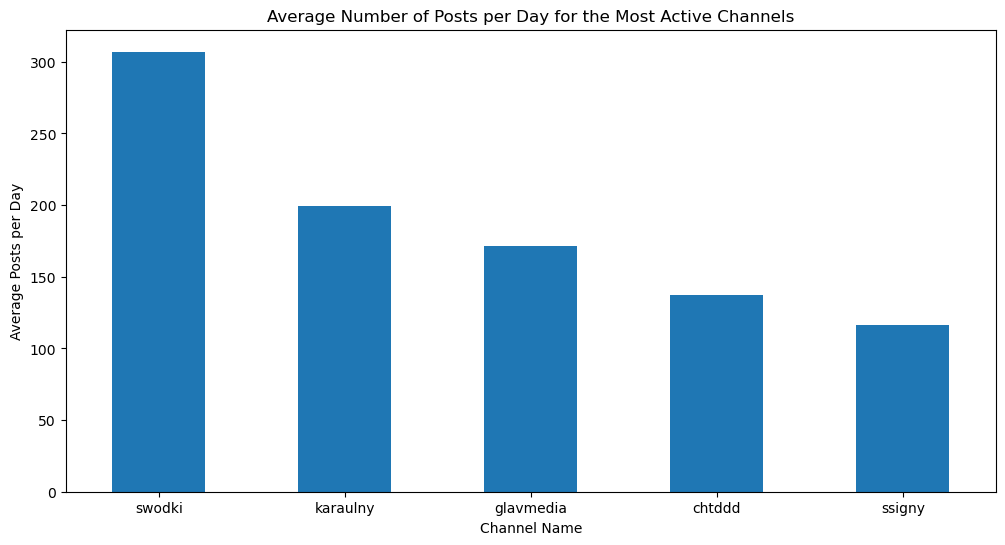

In [23]:
plt.figure(figsize=(12, 6))
most_active_channels.plot(kind='bar', rot=0)
plt.title('Average Number of Posts per Day for the Most Active Channels')
plt.xlabel('Channel Name')
plt.ylabel('Average Posts per Day')
plt.show()

## Question: What is most common words patterns(in one-month time period).

### Finding month with the most messages.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
month_post_counts = df['month'].value_counts()

most_posts_month = month_post_counts.idxmax()

print(f"The month with the most posts is: {most_posts_month}")

filtered_df = df[df['month'] == most_posts_month]

In [24]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

def extract_ngrams(text, n):
    if isinstance(text, str):
        text = preprocess_text(text)
        tokens = nltk.word_tokenize(text)
        n_grams = [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]
        return [' '.join(gram) for gram in n_grams]
    else:
        return []

def process_ngrams(chunk_df, n, pbar):
    ngram_counts = Counter()
    for text in chunk_df['message']:
        ngrams = extract_ngrams(text, n)
        ngram_counts.update(ngrams)
    pbar.update(1)
    return ngram_counts

ngram_lengths = [2, 3]
chunk_size = 100

start_time = '2022-12-01'
end_time = '2022-12-26'

filtered_df = df[(df['date'] >= start_time) & (df['date'] < end_time)]
num_chunks = len(filtered_df)

ngram_counts = {n: Counter() for n in ngram_lengths}

for ngram_length in ngram_lengths:
    pbar = tqdm(total=num_chunks, desc=f"Processing {ngram_length}-grams")
    for chunk_start in range(0, len(filtered_df), chunk_size):
        chunk_df = filtered_df.iloc[chunk_start:chunk_start + chunk_size]
        ngram_counts[ngram_length] += process_ngrams(chunk_df, ngram_length, pbar)
    pbar.close()

top_n = 50

top_ngrams_2 = ngram_counts[2].most_common(top_n)
top_ngrams_3 = ngram_counts[3].most_common(top_n)

Processing 3-grams:   1%|          | 1671/167093 [02:36<4:18:48, 10.65it/s]


In [25]:
top_ngrams_2

[('подписаться на', 9269),
 ('» —', 7156),
 ('в россии', 6080),
 ('в том', 6057),
 ('а также', 6011),
 ('об этом', 5874),
 ('на украине', 5372),
 ('и не', 5284),
 ('том что', 5210),
 ('и в', 5184),
 ('о том', 4983),
 ('» в', 4982),
 ('что в', 4724),
 ('» и', 4718),
 ('потому что', 4217),
 ('то что', 3941),
 ('при этом', 3863),
 ('в этом', 3847),
 ('в результате', 3689),
 ('заявил что', 3662),
 ('том числе', 3493),
 ('у нас', 3359),
 ('во время', 3324),
 ('в районе', 3231),
 ('не только', 3199),
 ('подпишись на', 3097),
 ('» «', 3070),
 ('в москве', 2974),
 ('иностранного агента', 2969),
 ('это не', 2819),
 ('и или', 2807),
 ('на русском', 2654),
 ('но и', 2593),
 ('со стороны', 2516),
 ('функции иностранного', 2465),
 ('не будет', 2462),
 ('выполняющим функции', 2456),
 ('rt на', 2443),
 ('по словам', 2372),
 ('2022 года', 2369),
 ('в ходе', 2358),
 ('что это', 2344),
 ('— rt', 2344),
 ('так и', 2343),
 ('и «', 2311),
 ('подпишись —', 2309),
 ('🟩 подпишись', 2304),
 ('на территории', 2

In [26]:
top_ngrams_3

[('в том числе', 3492),
 ('о том что', 3241),
 ('функции иностранного агента', 2464),
 ('выполняющим функции иностранного', 2453),
 ('rt на русском', 2386),
 ('— rt на', 2338),
 ('🟩 подпишись —', 2304),
 ('подпишись — rt', 2304),
 ('подписаться на 360', 1904),
 ('со ссылкой на', 1746),
 ('подписаться на zvezdanews', 1732),
 ('⭐️ подписаться на', 1730),
 ('в том что', 1714),
 ('по его словам', 1622),
 ('подписаться на izru', 1543),
 ('подпишись на ленту', 1381),
 ('в этом году', 1357),
 ('на ленту дня', 1356),
 ('в связи с', 1341),
 ('» и «', 1323),
 ('👉 подпишись на', 1310),
 ('специальной военной операции', 1286),
 ('подпишись на rtvi', 1253),
 ('данное сообщение материал', 1232),
 ('сообщение материал создано', 1232),
 ('материал создано и', 1232),
 ('создано и или', 1232),
 ('иностранного агента и', 1231),
 ('и или распространено', 1230),
 ('или распространено иностранным', 1228),
 ('распространено иностранным средством', 1228),
 ('иностранным средством массовой', 1228),
 ('лицом вы

C:\Users\yg_ya\AppData\Local\Temp\ipykernel_8384\643240895.py:8: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from current font.
  plt.tight_layout()
A:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


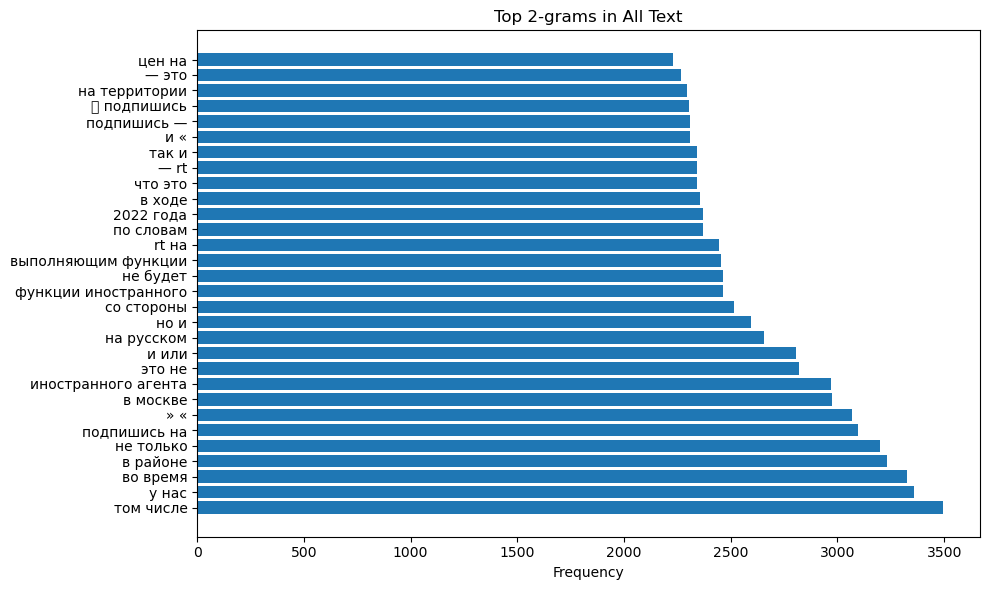

In [27]:
top_ngrams_to_plot = top_ngrams_2[len(top_ngrams_2)-30:len(top_ngrams_2)]
plt.figure(figsize=(10, 6))
ngrams, counts = zip(*top_ngrams_to_plot)

plt.barh(ngrams, counts)
plt.title(f'Top {2}-grams in All Text')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\yg_ya\AppData\Local\Temp\ipykernel_8384\3356464771.py:8: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from current font.
  plt.tight_layout()
C:\Users\yg_ya\AppData\Local\Temp\ipykernel_8384\3356464771.py:8: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
C:\Users\yg_ya\AppData\Local\Temp\ipykernel_8384\3356464771.py:8: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  plt.tight_layout()
A:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
A:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


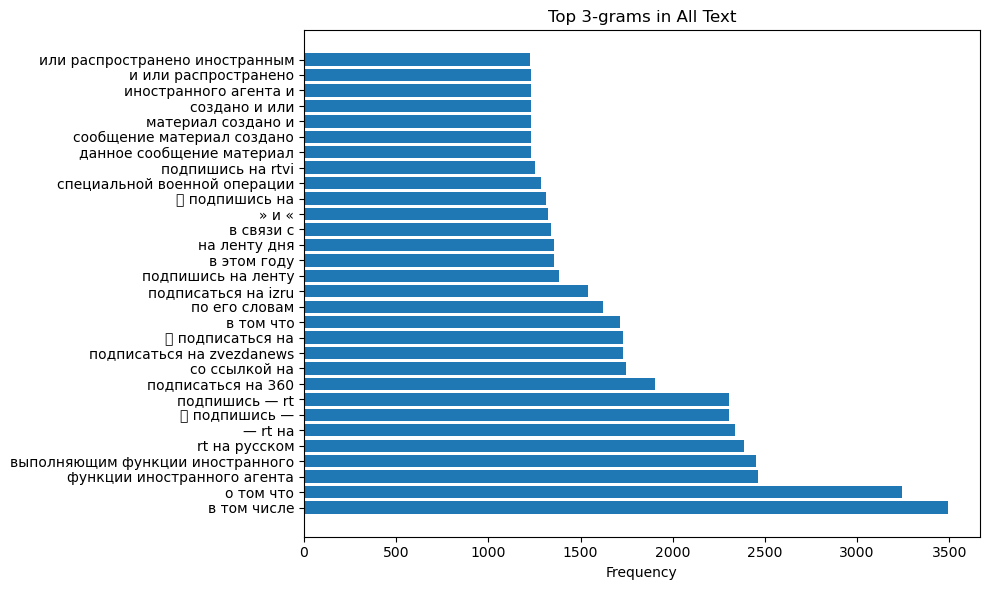

In [28]:
top_ngrams_to_plot = top_ngrams_3[len(top_ngrams_3)-50:len(top_ngrams_3)-20]
plt.figure(figsize=(10, 6))
ngrams, counts = zip(*top_ngrams_to_plot)

plt.barh(ngrams, counts)
plt.title(f'Top {3}-grams in All Text')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

## Question: What is the most common word  used in text posts for certain amount of channels?

In [29]:
start_date = pd.to_datetime('2022-02-24', utc=True)
end_date = pd.to_datetime('2022-12-31', utc=True)

random_channels = random.sample(df['channel_name'].unique().tolist(), 50)

text_posts = df[(df['type'] == 'text') & (df['date'] >= start_date) & (df['date'] <= end_date) & (df['channel_name'].isin(random_channels))]

text_posts['words'] = text_posts['message'].str.split()
text_posts = text_posts.explode('words')
text_posts = text_posts[text_posts['words'].str.len() > 3]

most_common_words = text_posts.groupby(['channel_name', 'words']).size().reset_index(name='count')
most_common_words = most_common_words.groupby('channel_name').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

print(most_common_words)

C:\Users\yg_ya\AppData\Local\Temp\ipykernel_8384\1268089664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_posts['words'] = text_posts['message'].str.split()


            channel_name                  words  count
0           Ateobreaking                 России   2317
1        BattleSailor_13                сегодня    465
2             MID_Russia                 России    721
3       Medvedeva_Olesya                  будет     48
4   NeoficialniyBeZsonoV  @NeoficialniyBeZsonoV    204
5      NoodleRemoverPlus                 только     80
6         PlushevChannel                 России    305
7         RIAKremlinpool                  Путин    557
8             RtrDonetsk                   н.п.    473
9      SergeyKolyasnikov                 России    608
10      anatoly_nesmiyan                  будет   1820
11            bbcrussian            @bbcrussian   8280
12         bolshiepushki                сегодня     16
13                chtddd                  будет   1434
14     dr_alex_sosnowski                 только    350
15             ebobo_rus                 скидка     27
16            emphasises                 России    658
17        

## Question: Which channels have the highest average views and reactions per post?

In [30]:
channel_stats = df.groupby('channel_name')
average_views = channel_stats['views'].mean()
average_stats = pd.DataFrame({'Average Views': average_views})
sorted_stats = average_stats.sort_values(by=['Average Views'], ascending=False)
top_10_channels = sorted_stats.head(10)

<Figure size 1200x600 with 0 Axes>

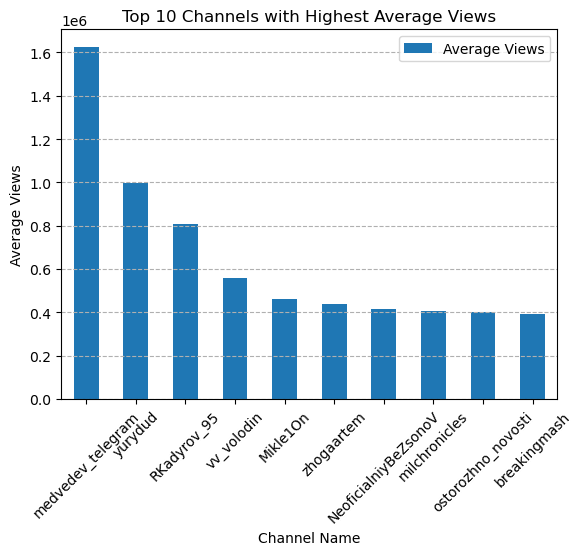

In [31]:
plt.figure(figsize=(12, 6))
top_10_channels.plot(kind='bar', rot=45)
plt.title('Top 10 Channels with Highest Average Views')
plt.xlabel('Channel Name')
plt.ylabel('Average Views')
plt.grid(axis='y', linestyle='--')
plt.show()

## Question: Which channels have the highest and lowest average post views?

In [32]:
average_post_views = df.groupby('channel_name')['views'].mean()
highest_average_views = average_post_views.idxmax()
lowest_average_views = average_post_views.idxmin()

highest_average_views_value = average_post_views.max()
lowest_average_views_value = average_post_views.min()

highest_lowest_average_views = pd.DataFrame({
    'Channel': [highest_average_views, lowest_average_views],
    'Average Post Views': [highest_average_views_value, lowest_average_views_value]
})

<Figure size 1000x500 with 0 Axes>

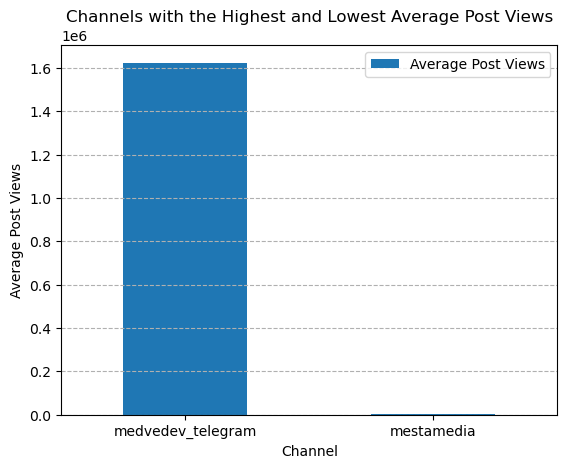

In [33]:
plt.figure(figsize=(10, 5))
highest_lowest_average_views.plot(x='Channel', y='Average Post Views', kind='bar', rot=0)
plt.title('Channels with the Highest and Lowest Average Post Views')
plt.xlabel('Channel')
plt.ylabel('Average Post Views')
plt.grid(axis='y', linestyle='--')
plt.show()

## Question: Which channel has the most amount of posts?

In [34]:
channel_post_counts = df['channel_name'].value_counts()

most_posts_channel = channel_post_counts.idxmax()
most_posts_count = channel_post_counts.max()

print(f"The channel with the most posts is '{most_posts_channel}' with {most_posts_count} posts.")

The channel with the most posts is 'karaulny' with 435487 posts.


## Question: Which channels have the most rapid growth in post count over a specific period?(before and right after the invasion)

In [35]:
df['date'] = pd.to_datetime(df['date'], utc=True)

start_date = pd.to_datetime('2022-01-01', utc=True)
end_date = pd.to_datetime('2022-03-01', utc=True)

filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

post_count_growth = filtered_df.groupby(['channel_name', filtered_df['date'].dt.date])['to_id'].count().reset_index()
post_count_growth = post_count_growth.pivot(index='channel_name', columns='date', values='to_id')

growth_rate = post_count_growth.diff(axis=1).mean(axis=1)
most_rapid_growth_channels = growth_rate.nlargest(10)

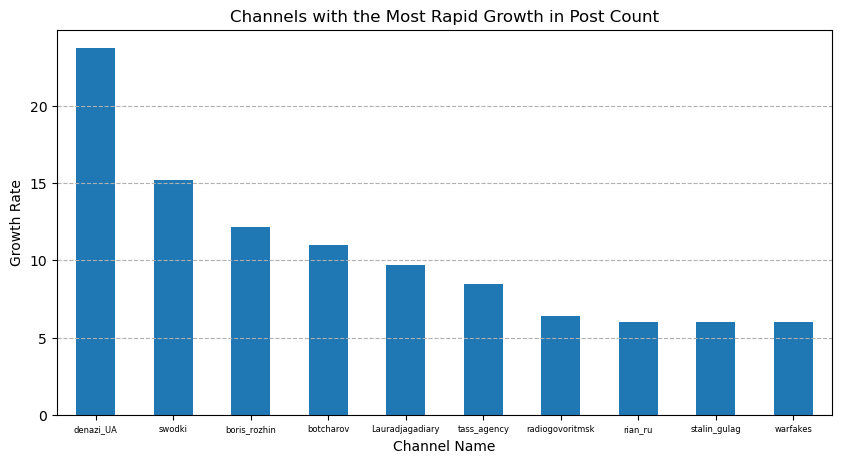

In [36]:
plt.figure(figsize=(10, 5))
most_rapid_growth_channels.plot(kind='bar', rot=0)
plt.title('Channels with the Most Rapid Growth in Post Count')
plt.xlabel('Channel Name')
plt.ylabel('Growth Rate')
plt.grid(axis='y', linestyle='--')
plt.xticks(fontsize = 6)
plt.show()

##  Question: What is the distribution of post types (text or media) across all channels and each channel specifically?

In [37]:

media_posts = df[df['type'].isin(['photo', 'video', 'audio'])]

post_type_distribution = df['type'].value_counts()

channel_post_type_distribution = df.groupby('channel_name')['type'].value_counts().unstack(fill_value=0)

Text(0, 0.5, 'Count')

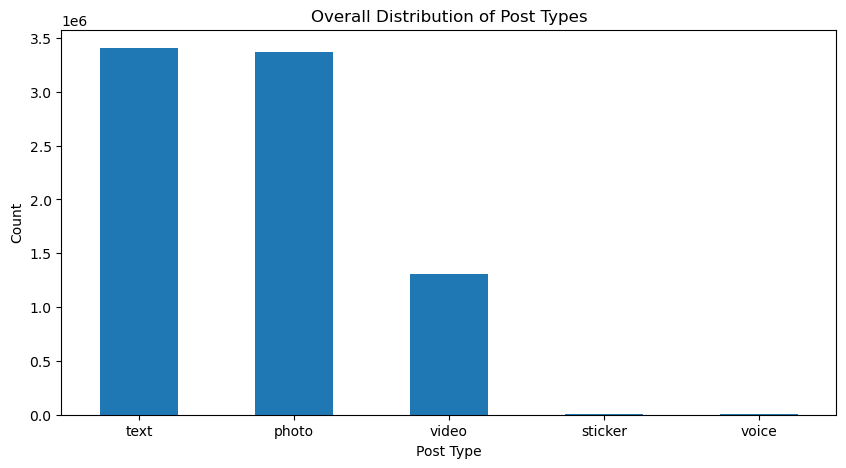

In [38]:
plt.figure(figsize=(10, 5))

post_type_distribution.plot(kind='bar', rot=0)
plt.title('Overall Distribution of Post Types')
plt.xlabel('Post Type')
plt.ylabel('Count')

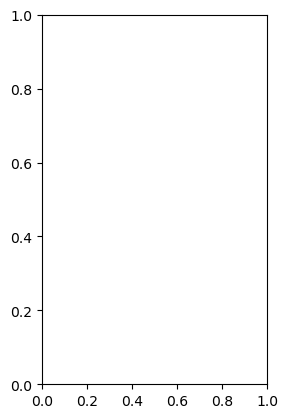

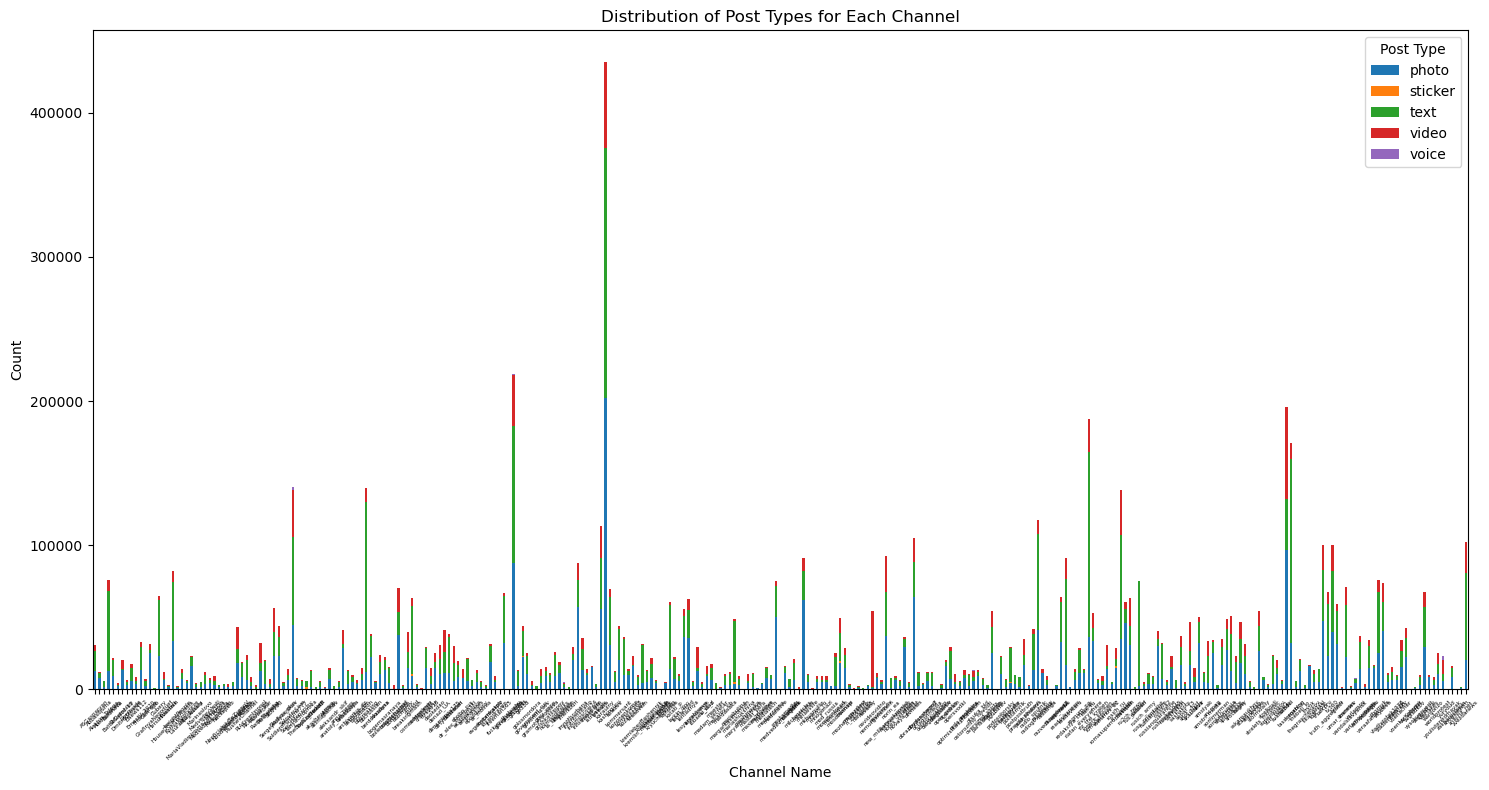

Overall Distribution of Post Types:
type
text       3407150
photo      3374347
video      1309641
sticker       9879
voice         7676
Name: count, dtype: int64

Distribution of Post Types for Each Channel:
type            photo  sticker   text  video  voice
channel_name                                       
ASGasparyan     12430        1  14500   4116      4
Abbasdjuma       7760        8   3308    925      1
Alekhin_Telega   1308        1   4219    315      1
Ateobreaking    12560       22  55711   7338      3
Baronova         9021       29  11199   1226     15
...               ...      ...    ...    ...    ...
yurydud            54        0     17     27      0
zakharprilepin   8509        3   5979   1828      0
zhogaartem         32        0      8     86      0
znachit_net       952        0    681     77      0
zvezdanews      20640        0  60119  21431      0

[299 rows x 5 columns]


In [39]:
plt.subplot(1, 2, 2)
channel_post_type_distribution.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Post Types for Each Channel')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.legend(title='Post Type')
plt.xticks(fontsize=4, rotation=45)
plt.tight_layout()
plt.show()


print("Overall Distribution of Post Types:")
print(post_type_distribution)


print("\nDistribution of Post Types for Each Channel:")
print(channel_post_type_distribution)

## Question: What is the distribution of post dates and times across all channels?

In [40]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df['post_date'] = df['date'].dt.date
df['post_time'] = df['date'].dt.time

post_date_distribution = df['post_date'].value_counts().sort_index()
post_time_distribution = df['post_time'].value_counts().sort_index()

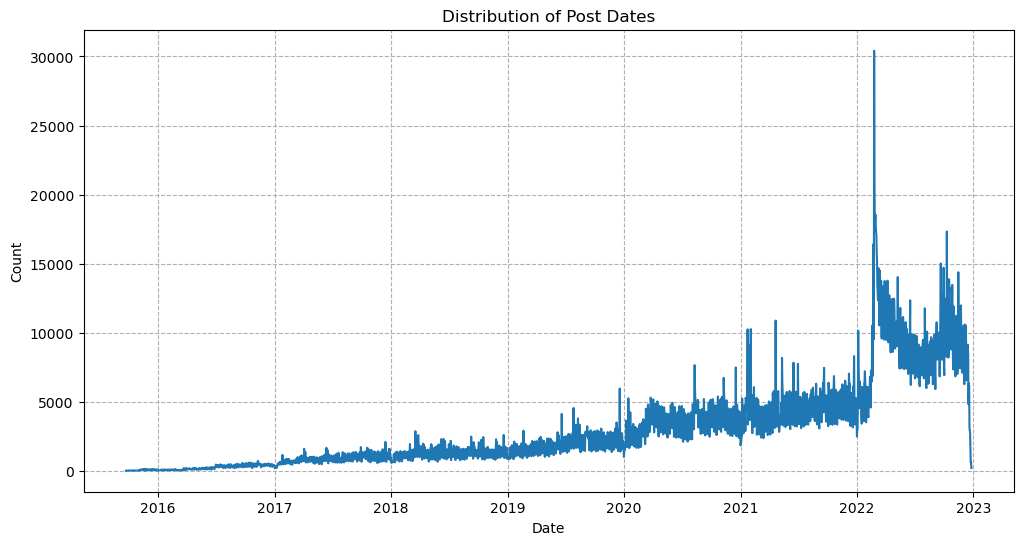

In [41]:
plt.figure(figsize=(12, 6))
post_date_distribution.plot(kind='line', rot=0)
plt.title('Distribution of Post Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True, linestyle='--')

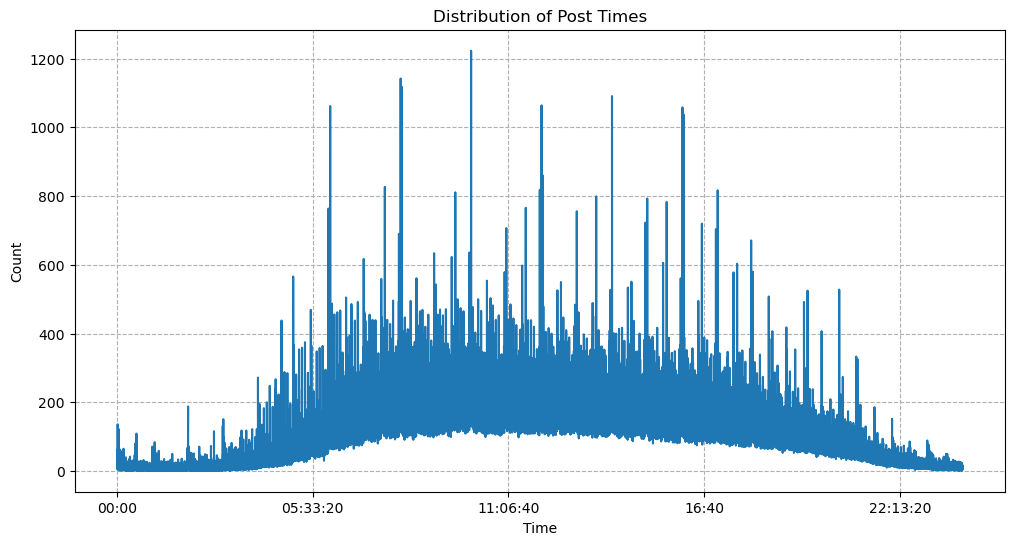

In [42]:
plt.figure(figsize=(12, 6))
post_time_distribution.plot(kind='line', rot=0)
plt.title('Distribution of Post Times')
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True, linestyle='--')
plt.show()

## Question: What is the most common time of day for posts to be made in each channel?

In [43]:
df['date'] = pd.to_datetime(df['date'], utc=True)

df['hour'] = df['date'].dt.hour


channel_hour_counts = df.groupby(['channel_name', 'hour']).size().reset_index(name='post_count')


idx = channel_hour_counts.groupby('channel_name')['post_count'].transform(max) == channel_hour_counts['post_count']
most_common_hours = channel_hour_counts[idx]


print("Most Common Hours for Posts in Each Channel:")
print(most_common_hours)

Most Common Hours for Posts in Each Channel:
        channel_name  hour  post_count
7        ASGasparyan     8        2342
30        Abbasdjuma     9         901
57    Alekhin_Telega    14         521
74      Ateobreaking     9        5701
101         Baronova    12        1701
...              ...   ...         ...
6800         yurydud    14          15
6813  zakharprilepin     6        1127
6845      zhogaartem    17          15
6853     znachit_net     9         203
6876      zvezdanews     9       10037

[303 rows x 3 columns]


## Question: Which channels have the highest proportion of forwarded posts, and from which other channels are they mostly forwarded?

In [45]:
forwarded_posts = df[df['fwd_from'].notnull()]

total_forwarded_posts = forwarded_posts.groupby('channel_name')['to_id'].count()

total_posts = df.groupby('channel_name')['id'].count()

proportion_forwarded_posts = total_forwarded_posts / total_posts


channel_with_highest_proportion = proportion_forwarded_posts.idxmax()
highest_proportion = proportion_forwarded_posts.max()


channels_forwarded_from = forwarded_posts[forwarded_posts['channel_name'] == channel_with_highest_proportion]
channels_forwarded_from_counts = channels_forwarded_from['fwd_from'].str.extract(r'channel_id=(\d+)')[0].value_counts()


print(f"The channel with the highest proportion of forwarded posts is '{channel_with_highest_proportion}' with a proportion of {highest_proportion:.2f}.")
print(f"The channels mostly forwarding to '{channel_with_highest_proportion}' are:")
print(channels_forwarded_from_counts)


The channel with the highest proportion of forwarded posts is 'navideovidno' with a proportion of 0.98.
The channels mostly forwarding to 'navideovidno' are:
0
1223185389    3065
1070404049    2760
1394050290    1849
1036362176    1742
1069772626    1427
              ... 
1181003014       1
1154938445       1
1228262504       1
1437721680       1
1107235668       1
Name: count, Length: 1717, dtype: int64


## Question: How does the number of posts vary on different days of the week?

In [46]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df['day_of_week'] = df['date'].dt.dayofweek

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

posts_by_day = df['day_of_week'].value_counts().sort_index()

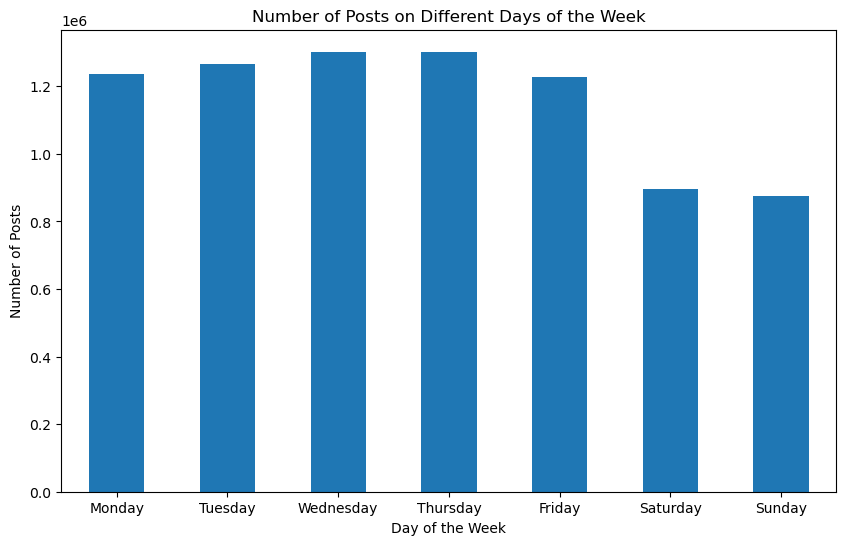

In [47]:
plt.figure(figsize=(10, 6))
posts_by_day.plot(kind='bar', rot=0)
plt.title('Number of Posts on Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.xticks(range(7), day_names)
plt.show()